---
title: Resampling de series temporales con Pandas
date: 2023-07-18
authors: [ccdarvin]
tags: [pandas, series temporales, resampling]
---

# Resampling series de tiempo con pandas

En este articulo vamos a ver como hacer resampling de series de tiempo con pandas. El resampling es un proceso de conversión de series de tiempo de una frecuencia a otra. La frecuencia puede ser diaria, mensual, trimestral, anual, etc. Por ejemplo, podemos convertir una serie de tiempo con frecuencia diaria a una serie de tiempo con frecuencia mensual. También podemos convertir una serie de tiempo con frecuencia mensual a una serie de tiempo con frecuencia anual.


## 1. Frecuencias de series de tiempo

Las series de tiempo pueden tener diferentes frecuencias, ahora vamos a ver las frecuencias que podemos encontrar en pandas.

| Código | Descripción |
| --- | --- |
| B | Frecuencia de negocios |
| C | Frecuencia personalizada |
| D | Frecuencia diaria |
| W | Frecuencia semanal |
| M | Frecuencia mensual |
| Q | Frecuencia trimestral |
| A | Frecuencia anual |
| H | Frecuencia horaria |
| T | Frecuencia minutal |
| S | Frecuencia segundal |


## 2. Importar librerías

Primero empesaremos importando las librerías que vamos a utilizar.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 3. Cagar y preparar los datos

Ahora vamos a crear un DataFrame con datos usando una frecuencia diaria.

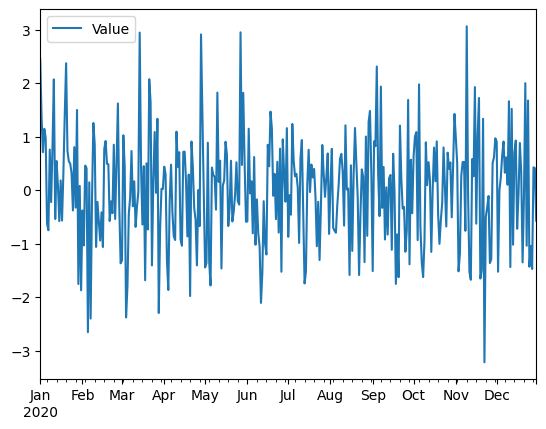

In [3]:
date_range = pd.date_range('01/01/2020', periods=365, freq='D')
# crearemos datos para la demostración
data = np.random.randn(len(date_range))
df = pd.DataFrame(data, index=date_range, columns=['Value'])
# graficamos los datos
df.plot()
plt.show()

## 4. Resampling a una frecuencia mas baja (downsampling)

Ahora vamos a convertir la serie de tiempo con frecuencia diaria a una serie de tiempo con frecuencia mensual. Para hacer esto vamos a usar el método `resample()`, al tener una frecuencia mas baja tenemos que especificar como queremos que se agreguen los datos, vamos a tener que ingresar una función de agregación. En este caso vamos a usar la función `mean()` para calcular el promedio de los datos, peru tu puedes usar cualquier función de agregación que necesites.

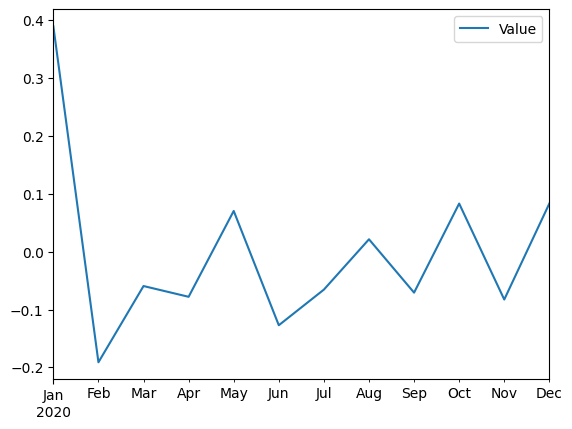

In [4]:
df_monthly_mean = df.resample('M').mean()
df_monthly_mean.head(5)
# graficamos los datos
df_monthly_mean.plot()
plt.show()

## 5. Resampling a una frecuencia mas alta (upsampling)

Ya vimos como disminuir la frecuencia, ahora veremos como aumentar la frecuencia. Para hacer esto vamos a usar el método `resample()` y especificar la frecuencia que queremos. En este caso vamos a aumentar la frecuencia de diaria a horaria, para esto vamos a usar el código `H` que significa frecuencia horaria.

In [5]:
df_hourly = df.resample('H').ffill() # otros metodos: bfill, interpolate

Para poder ver con mas detalle los datos haremos un acercamiento a un periodo de tiempo especifico.

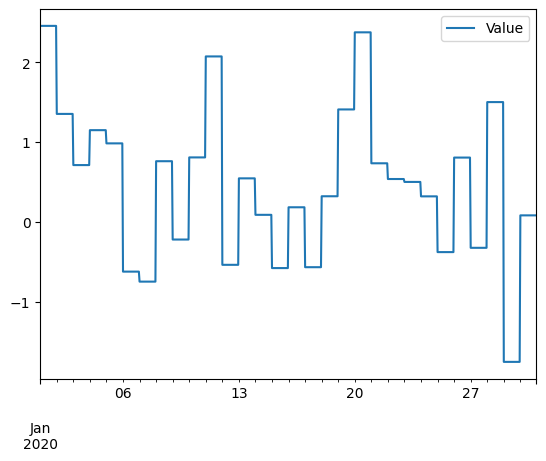

In [6]:
df_hourly.loc['2020-01-01':'2020-01-30'].plot()
plt.show()

## 6. Manejar los datos faltantes

Como pudimos ver en el ejemplo anterior cuando aumentamos la frecuencía de diaria a horaria, muchos valores se convirtieron en `NaN`. Para solucionar esto vamos a usar el método `interpolate()` para interpolar los valores faltantes.

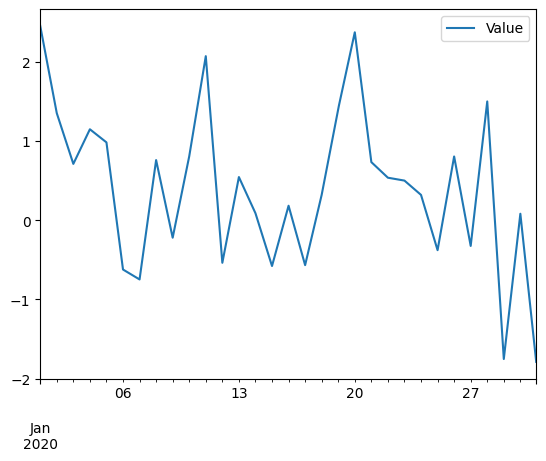

In [7]:
df_hourly = df.resample('H').interpolate()
df_hourly.loc['2020-01-01':'2020-01-30'].plot()
plt.show()

## 7. Resampling con multiples metodos de agregación

Tambien podemos hacer un resampling con multiples métodos de agregación. Para hacer esto vamos a usar el método `agg()` y especificar los métodos de agregación que queremos usar.

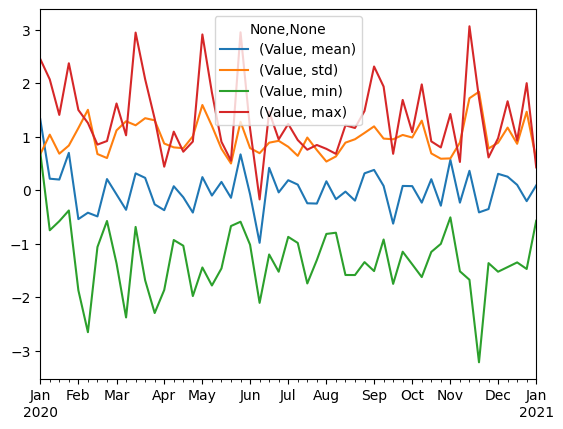

In [8]:
df_weekly = df.resample('W').agg(['mean', 'std', 'min', 'max'])
df_weekly.plot()
plt.show()

Eso es todo por ahora, espero que este articulo te haya sido de ayuda